### Importing necessary libraries 

In [193]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Reading data from csv file and converting it to dataframe

In [194]:
data = pd.read_csv('movies.csv')
df = pd.DataFrame(data)

In [195]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


Removing the Unnamed column 

In [196]:
df = df.drop(['Unnamed: 0'],axis=1)

In [197]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [198]:
##Checking the dimensions of data

In [199]:
df.shape

(16744, 16)

In [200]:
df.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


Checking for null values 

In [202]:
df.isnull().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

Dropping columns Rotten Tomatoes and Age as they have null values more than 50% 

In [203]:
df = df.drop(['Rotten Tomatoes','Age'],axis=1)

In [204]:
df.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


Dropping na values from the rest of the columns

In [205]:
final_df = df.dropna(subset=['IMDb','Directors','Genres','Country','Language','Runtime'])
final_df.reset_index(inplace=True,drop=True)

In [206]:
final_df.shape

(15233, 14)

In [207]:
final_df.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [208]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15233 entries, 0 to 15232
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           15233 non-null  int64  
 1   Title        15233 non-null  object 
 2   Year         15233 non-null  int64  
 3   IMDb         15233 non-null  float64
 4   Netflix      15233 non-null  int64  
 5   Hulu         15233 non-null  int64  
 6   Prime Video  15233 non-null  int64  
 7   Disney+      15233 non-null  int64  
 8   Type         15233 non-null  int64  
 9   Directors    15233 non-null  object 
 10  Genres       15233 non-null  object 
 11  Country      15233 non-null  object 
 12  Language     15233 non-null  object 
 13  Runtime      15233 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 1.6+ MB


#### Plotting distributions based on IMDb ratings, Year & Runtime

c:\users\student\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


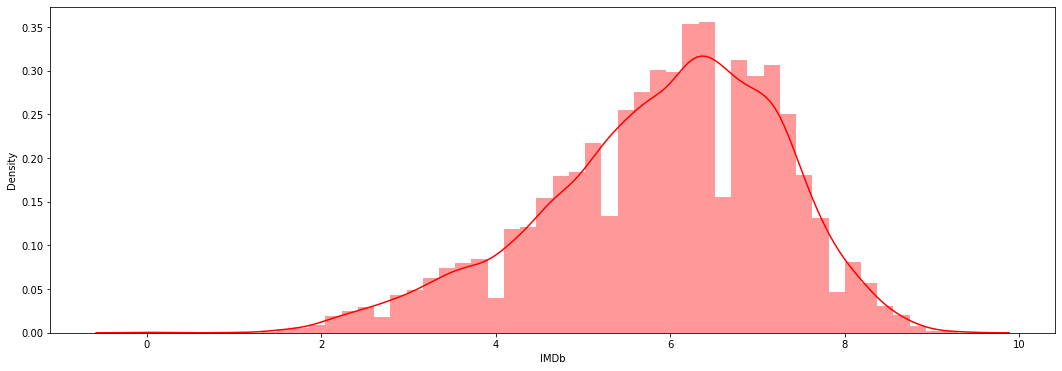

In [316]:
plt.figure(figsize=(18,6))
sns.distplot(df['IMDb'],color='r')
plt.show()

c:\users\student\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


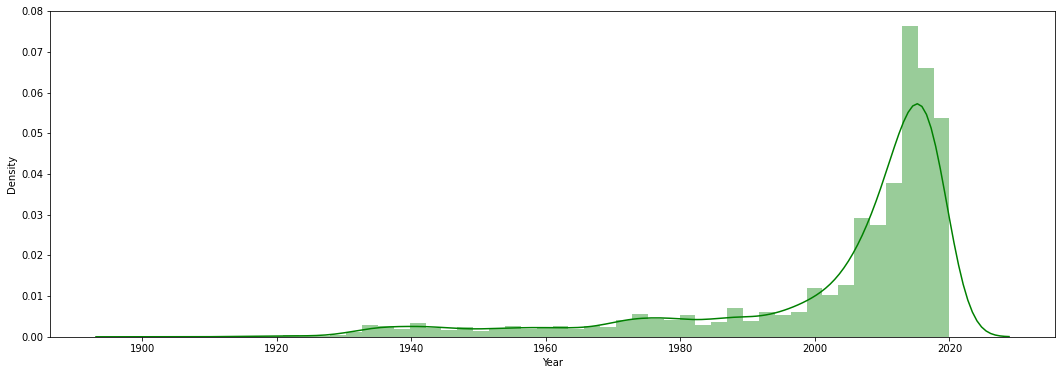

In [317]:
plt.figure(figsize=(18,6))
sns.distplot(df['Year'],color='g')
plt.show()

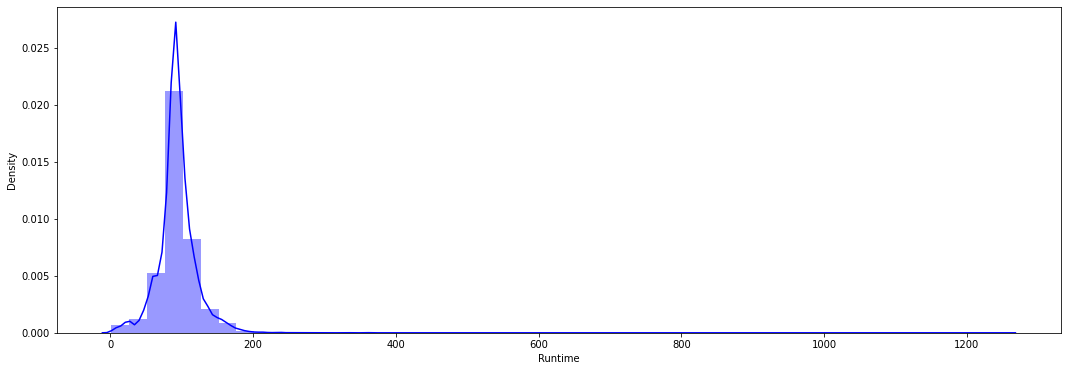

In [319]:
plt.figure(figsize=(18,6))
sns.distplot(df['Runtime'],color='b')
plt.show()

#### Movie ditribution based on country

In [230]:
#split and explode the country column
final_df = final_df.assign(Country=final_df['Country'].str.split(',')).explode('Country')


In [253]:
#Considering the top 15 countries in the list
final_df['Country'].value_counts()[:15]

United States     9862
United Kingdom    1572
India             1077
Canada            1065
France             704
Germany            475
Italy              402
Spain              318
Australia          302
Hong Kong          266
Japan              251
China              183
Mexico             165
South Korea        151
Belgium            144
Name: Country, dtype: int64

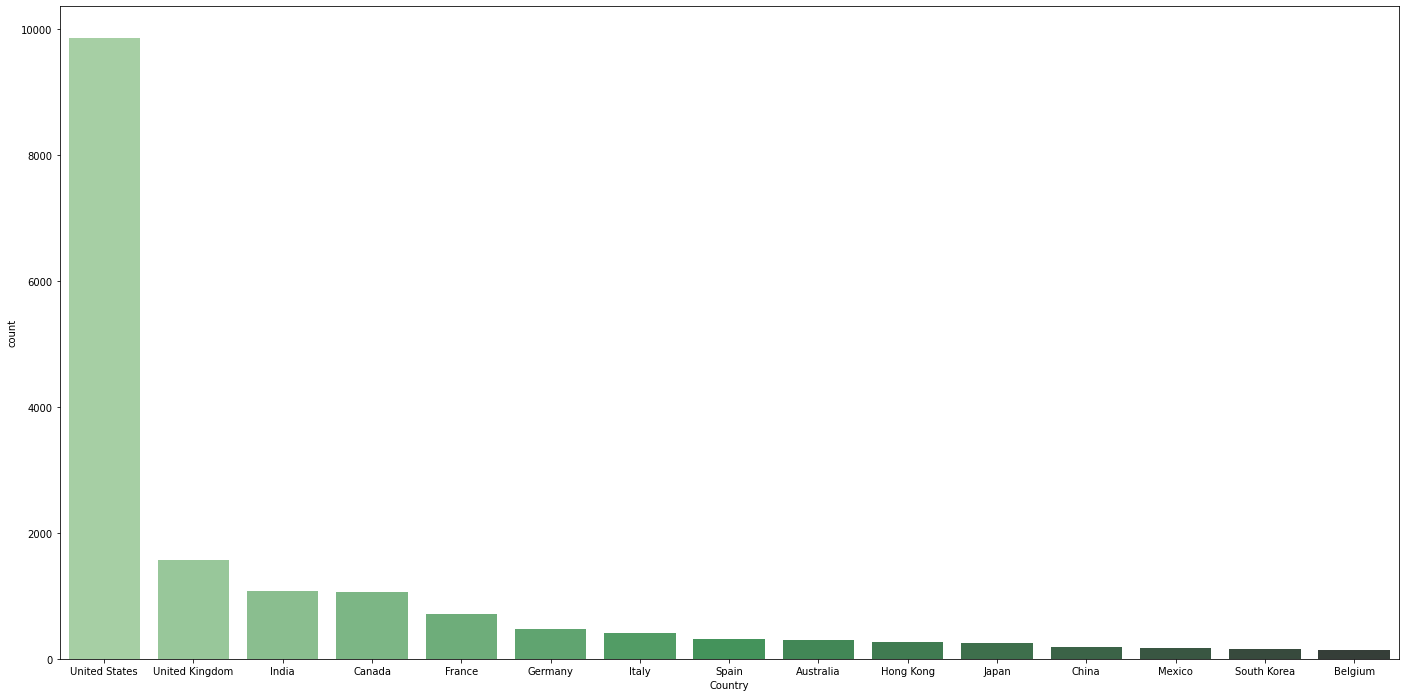

In [279]:
plt.figure(figsize=(24,12))
sns.countplot(x="Country", data= final_df, palette="Greens_d",
              order=final_df.Country.value_counts().iloc[:15].index)
plt.show()

#### Movie distribution based on langauge

In [252]:
la = final_df.assign(Language=final_df['Language'].str.split(',')).explode('Language')

In [264]:
la.Language.value_counts().iloc[:13]

English       15924
Spanish        1314
French         1293
German          813
Hindi           746
Italian         729
Mandarin        508
Japanese        387
Russian         348
Arabic          315
Cantonese       239
Korean          216
Portuguese      165
Name: Language, dtype: int64

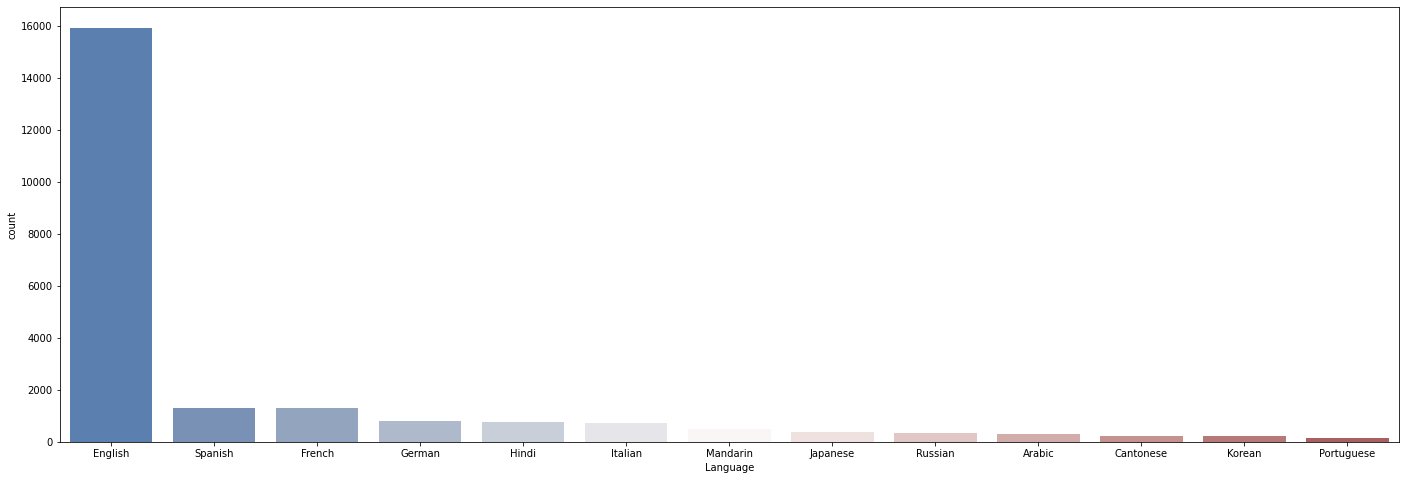

In [278]:
plt.figure(figsize=(24,8))
sns.countplot(x="Language", data=la, palette="vlag",
              order=la.Language.value_counts().iloc[:13].index)
plt.show()

#### Movie distribution based on Genres

In [270]:
ge = final_df.assign(Genres=final_df['Genres'].str.split(',')).explode('Genres')

In [271]:
ge.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,Action,United States,"English,Japanese,French",148.0
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,Adventure,United States,"English,Japanese,French",148.0
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,Sci-Fi,United States,"English,Japanese,French",148.0
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,Thriller,United States,"English,Japanese,French",148.0
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,Action,United Kingdom,"English,Japanese,French",148.0


In [277]:
ge.Genres.value_counts().iloc[:20]

Drama          9119
Comedy         5149
Thriller       4221
Action         3366
Documentary    3032
Romance        2853
Horror         2563
Adventure      2471
Crime          2222
Family         1867
Mystery        1598
Sci-Fi         1493
Fantasy        1432
Biography      1218
History        1134
Animation       928
Music           818
War             805
Western         583
Musical         487
Name: Genres, dtype: int64

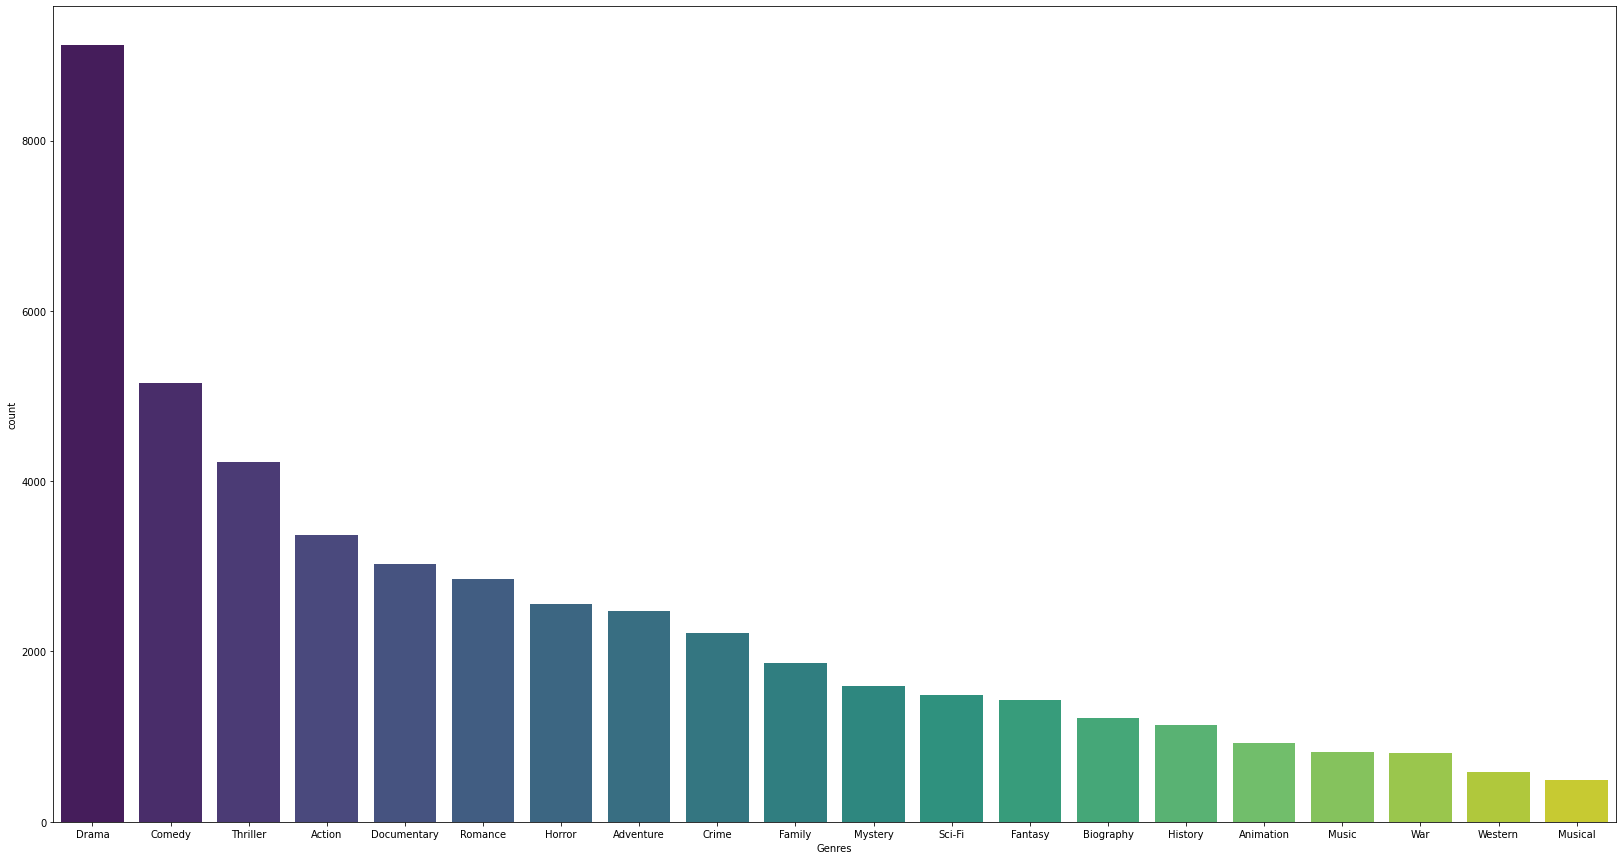

In [322]:
plt.figure(figsize=(28,15))
sns.countplot(x="Genres", data=ge, palette="viridis",
              order=ge.Genres.value_counts().iloc[:20].index)
plt.show()

#### Movie categorization based on each platform

In [298]:
final_df.Netflix.value_counts()

0    15350
1     4111
Name: Netflix, dtype: int64

In [299]:
final_df.Hulu.value_counts()

0    18220
1     1241
Name: Hulu, dtype: int64

In [301]:
final_df['Prime Video'].value_counts()

1    14219
0     5242
Name: Prime Video, dtype: int64

In [302]:
final_df['Disney+'].value_counts()

0    18771
1      690
Name: Disney+, dtype: int64

In [304]:
#Creating a helper function to get value counts
def cnt(pltfrm):
    return final_df[pltfrm].sum()

In [306]:
#Getting each platforms total movies
sizes = [cnt('Netflix'),cnt('Hulu'),cnt('Prime Video'),cnt('Disney+')]

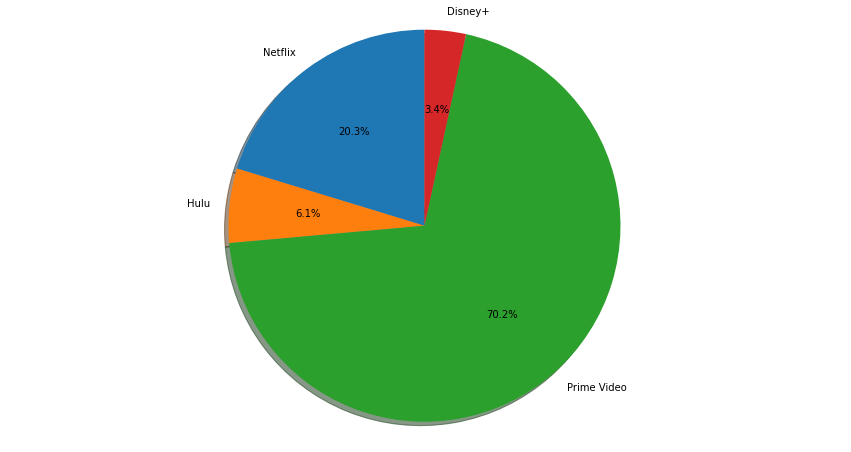

In [320]:
labels = 'Netflix','Hulu','Prime Video', 'Disney+'

fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()